In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import plotly
sns.set_style('whitegrid')

In [2]:
# load the dataset
subjects=pd.read_csv("activities with common attributes.csv")
subjects.drop(columns='Unnamed: 0',inplace=True)
sample = subjects.copy()
# train_test_split
df_train=sample[(sample['subject_number']!=10)].drop(columns=['electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'])
df_test=sample[(sample['subject_number']==10)].drop(columns=['electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'])

In [3]:
# convert the label into names of activities
label_to_activity = {'1': 'Standing still','2':'Sitting and relaxing','3':'Lying down',
                     '4':'Walking','5':'Climbing stairs','6':'Waist bends forward',
                    '7':'Frontal elevation of arms','8':'Knees bending (crouching)','9':'Cycling',
                     '10':'Jogging','11':'Running','12':'Jump front & back'}
df_train['Activity']=df_train['Label (0 for the null class)'].astype(str).map(label_to_activity)

# activity_to_type = {'1': 'Stationary Activity','2':'Stationary Activity','3':'Stationary Activity',
#                      '4':'Moving Activity','5':'Moving Activity','6':'Moving Activity',
#                     '7':'Moving Activity','8':'Moving Activity','9':'Moving Activity',
#                      '10':'Moving Activity','11':'Moving Activity','12':'Moving Activity'}
# df_train['Activity Type']=df_train['Label (0 for the null class)'].astype(str).map(activity_to_type)


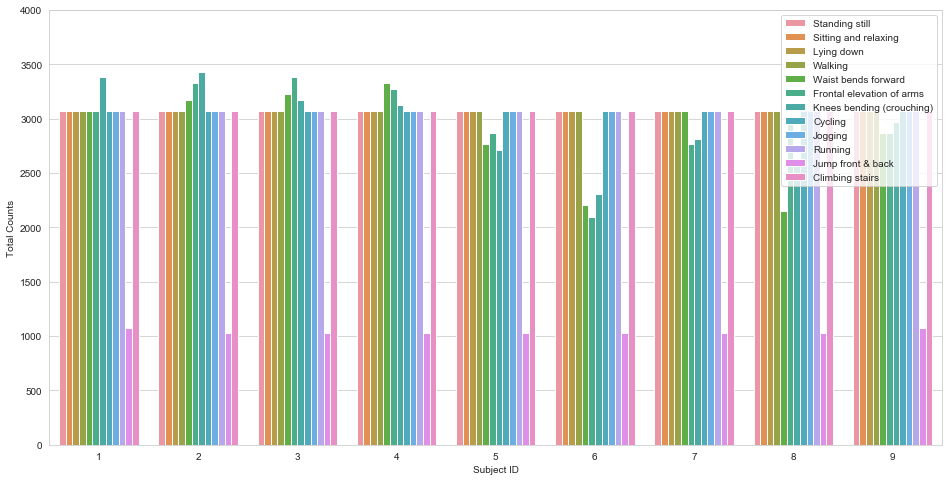

In [4]:
# plot the data points by each subject
plt.figure(figsize=(16,8))
# plt.title('Data Provided by Each Subject', fontsize=20)
sns.countplot(x='subject_number',hue='Activity', data = df_train)
plt.xlabel('Subject ID')
plt.ylabel('Total Counts')
plt.ylim(0,4000)
plt.legend(loc='upper right')
plt.show()

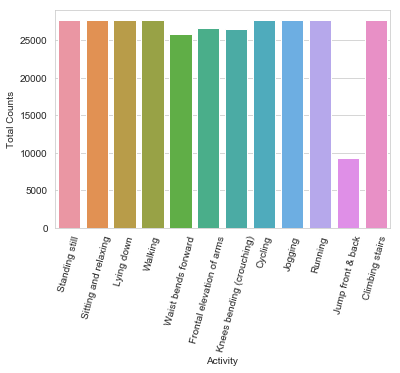

In [5]:
# plot the number of data points by each activity
# plt.title('Number of Datapoints per Activity', fontsize=15)
sns.countplot(df_train.Activity)
plt.xticks(rotation=75)
plt.ylabel('Total Counts')
plt.show()

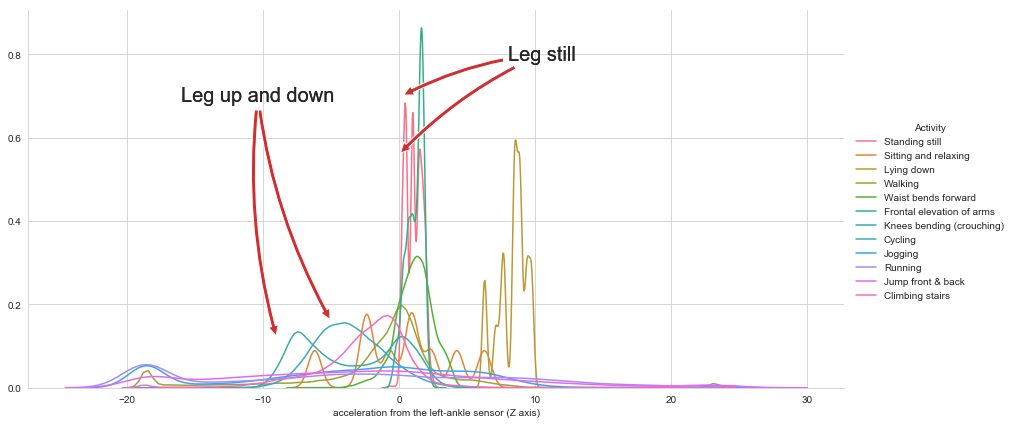

In [35]:
# use seaborn to plot the leg still and non-leg still left ankle acceleration signal distribution
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df_train, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'acceleration from the left-ankle sensor (Z axis)', hist=False)\
    .add_legend()
plt.annotate("Leg still", xy=(0,0.56), xytext=(8, 0.8), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Leg still", xy=(0.2,0.7), xytext=(8, 0.8), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Leg up and down", xy=(-5,0.16), xytext=(-16, 0.7), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Leg up and down", xy=(-9,0.12), xytext=(-16, 0.7), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.show()

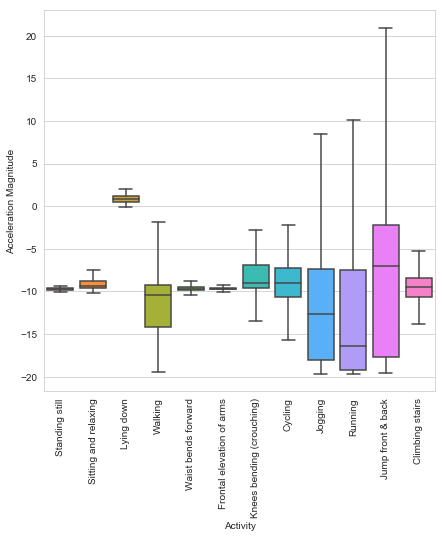

In [33]:
# plot the box plot of y axis acceleration distribution from left-ankle
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='acceleration from the left-ankle sensor (Y axis)',data=df_train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude')
# plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
# plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()